### Sentiment Analysis Scenario 3

In [30]:
import pandas as pd
df = pd.read_csv('draft_sentiment_scores_busts4.csv')

In [31]:
df.head()

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,...,Outlook_Preprocessed,Perf,DraftX,Bscore,Ascore,Bust,Bust2,Bust3,Bust4,Weaknesses_Preprossed_Compound
0,1630224,Jalen Green,2021,1,2,2,Draft,1610612745,Houston,Rockets,...,forgoing college play nba gleagues pathway pro...,58.549650,1.05,61.477133,0.155273175,TBD,TBD,TBD,Y,0.9979
1,1629628,RJ Barrett,2019,1,3,3,Draft,1610612752,New York,Knicks,...,incoming duke freshman head top recruiting cla...,59.833210,1.10,65.816531,0.162913791,N,N,N,Y,0.9977
2,1628963,Marvin Bagley III,2018,1,2,2,Draft,1610612758,Sacramento,Kings,...,duke freshman earned mvp le schwab invitationa...,47.007812,1.05,49.358203,0.686888832,N,Y,MID,N,0.9973
3,1630164,James Wiseman,2020,1,2,2,Draft,1610612744,Golden State,Warriors,...,outlook incoming memphis freshman 2019 morgan ...,38.192248,1.05,40.101860,0.350270053,TBD,TBD,TBD,N,0.9967
4,1628398,Kyle Kuzma,2017,1,27,27,Draft,1610612751,Brooklyn,Nets,...,NaN,57.246305,2.30,131.666503,0.385357081,N,N,N,N,0.9964


In [32]:
# Sort the DataFrame by 'Weaknesses_Compound' column in ascending order (positive sentiment first)
sorted_df = df.sort_values(by='Weaknesses_Preprossed_Compound', ascending=True)

# Select the top 200 most positive and negative rows
top_200_positive = sorted_df.head(200)
top_200_negative = sorted_df.tail(200)

# Concatenate the two DataFrames to create a new DataFrame
result_df = pd.concat([top_200_positive, top_200_negative])

# Save the resulting DataFrame to a CSV file
result_df.to_csv('top_200_sentiment_rows.csv', index=False)


In [33]:
# Create a new column 'Sentiment_Label' and assign '1' to positive rows and '0' to negative rows
result_df['Sentiment_Label'] = result_df['Weaknesses_Preprossed_Compound'].apply(lambda x: 1 if x >= 0 else 0)

# Save the updated DataFrame to a CSV file
result_df.to_csv('top_200_sentiment_labeled_rows.csv', index=False)


In [34]:
result_df.tail()

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,...,Perf,DraftX,Bscore,Ascore,Bust,Bust2,Bust3,Bust4,Weaknesses_Preprossed_Compound,Sentiment_Label
4,1628398,Kyle Kuzma,2017,1,27,27,Draft,1610612751,Brooklyn,Nets,...,57.246305,2.30,131.666503,0.385357081,N,N,N,N,0.9964,1
3,1630164,James Wiseman,2020,1,2,2,Draft,1610612744,Golden State,Warriors,...,38.192248,1.05,40.101860,0.350270053,TBD,TBD,TBD,N,0.9967,1
2,1628963,Marvin Bagley III,2018,1,2,2,Draft,1610612758,Sacramento,Kings,...,47.007812,1.05,49.358203,0.686888832,N,Y,MID,N,0.9973,1
1,1629628,RJ Barrett,2019,1,3,3,Draft,1610612752,New York,Knicks,...,59.833210,1.10,65.816531,0.162913791,N,N,N,Y,0.9977,1
0,1630224,Jalen Green,2021,1,2,2,Draft,1610612745,Houston,Rockets,...,58.549650,1.05,61.477133,0.155273175,TBD,TBD,TBD,Y,0.9979,1


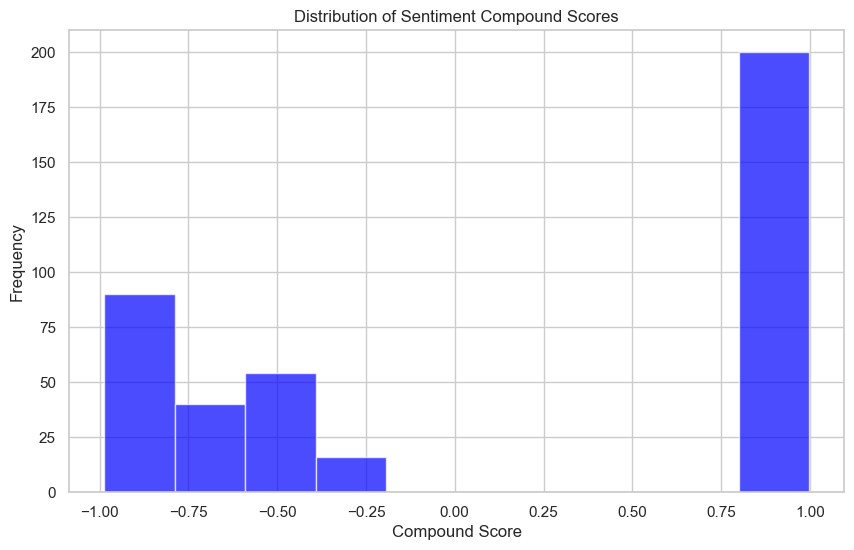

In [46]:
import matplotlib.pyplot as plt

# Filter out rows with NaN values in the compound scores
df_filtered = result_df.dropna(subset=['Weaknesses_Preprossed_Compound'])

# Create a histogram of the compound scores
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Weaknesses_Preprossed_Compound'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Compound Scores')
plt.grid(True)
plt.show()

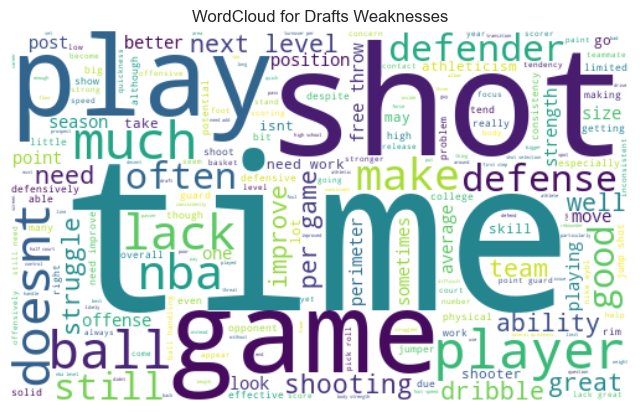

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine strengths and weaknesses text
combined_text = result_df['Weaknesses_Preprocessed'].str.cat(sep=' ')

# Generate word cloud
wordcloud = WordCloud(width=500, height=300, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Drafts Weaknesses')
plt.show()


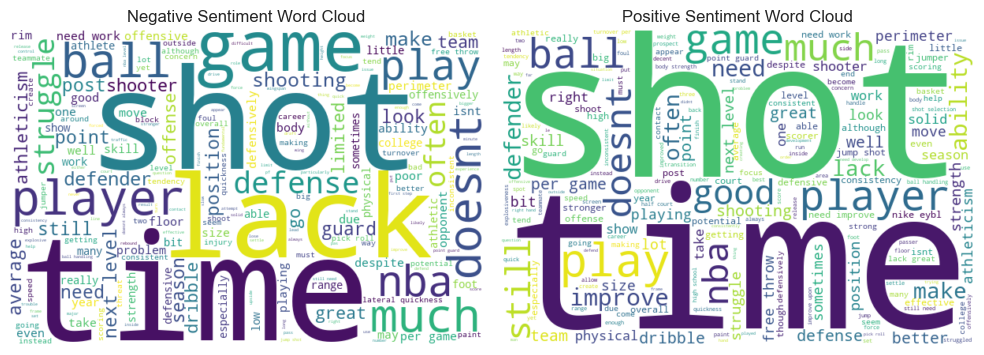

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_sentiment = result_df

# Create word clouds for Positive and Negative sentiments
positive_sentiment_text = " ".join(df_sentiment[df_sentiment['Sentiment_Label'] == 1]['Weaknesses_Preprocessed'])
negative_sentiment_text = " ".join(df_sentiment[df_sentiment['Sentiment_Label'] == 0]['Weaknesses_Preprocessed'])

# Create word cloud for Positive sentiment
wordcloud_positive = WordCloud(width=600, height=400, background_color='white').generate(positive_sentiment_text)

# Create word cloud for Negative sentiment
wordcloud_negative = WordCloud(width=600, height=400, background_color='white').generate(negative_sentiment_text)

# Display the word clouds one after the other with the same size
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Negative Sentiment Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Positive Sentiment Word Cloud")
plt.axis('off')

plt.tight_layout()
plt.show()


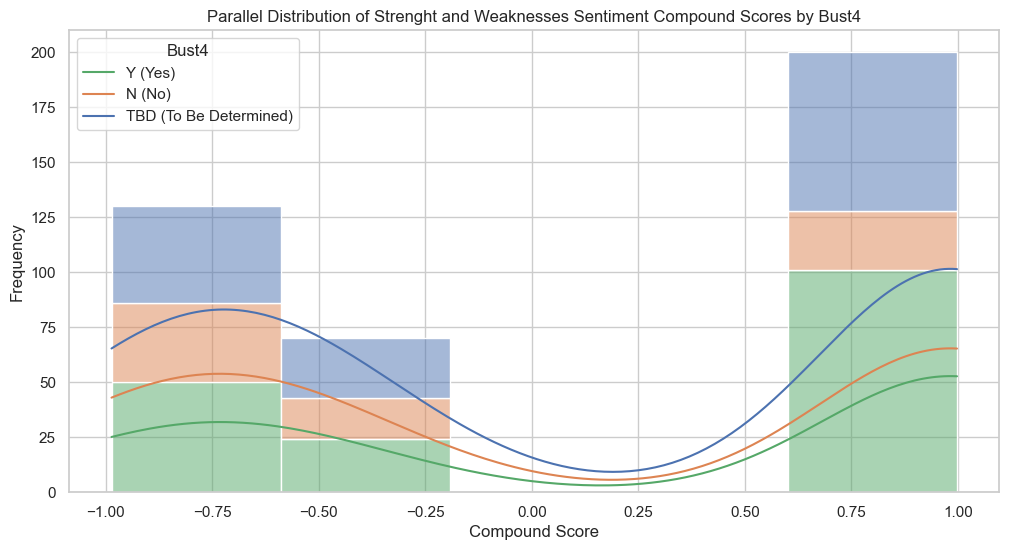

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style of seaborn
sns.set(style="whitegrid")

# Create a parallel distribution plot of scores and Bust2 players using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=df_sentiment, x='Weaknesses_Preprossed_Compound', hue='Bust4', multiple='stack', bins=5, kde=True)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Parallel Distribution of Strenght and Weaknesses Sentiment Compound Scores by Bust4')
plt.legend(title='Bust4', labels=['Y (Yes)', 'N (No)', 'TBD (To Be Determined)'])
plt.show()

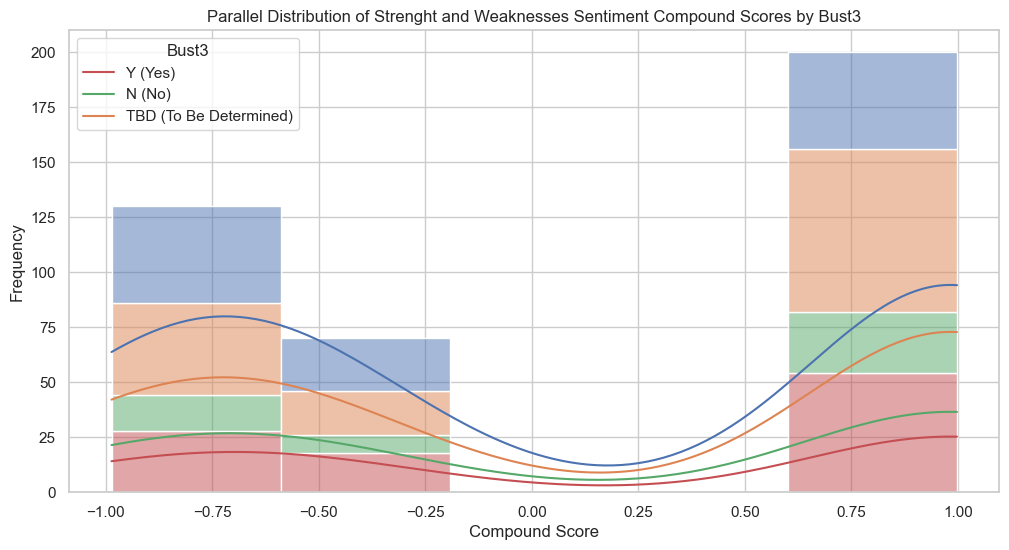

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style of seaborn
sns.set(style="whitegrid")

# Create a parallel distribution plot of scores and Bust2 players using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=df_sentiment, x='Weaknesses_Preprossed_Compound', hue='Bust3', multiple='stack', bins=5, kde=True)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Parallel Distribution of Strenght and Weaknesses Sentiment Compound Scores by Bust3')
plt.legend(title='Bust3', labels=['Y (Yes)', 'N (No)', 'TBD (To Be Determined)'])
plt.show()

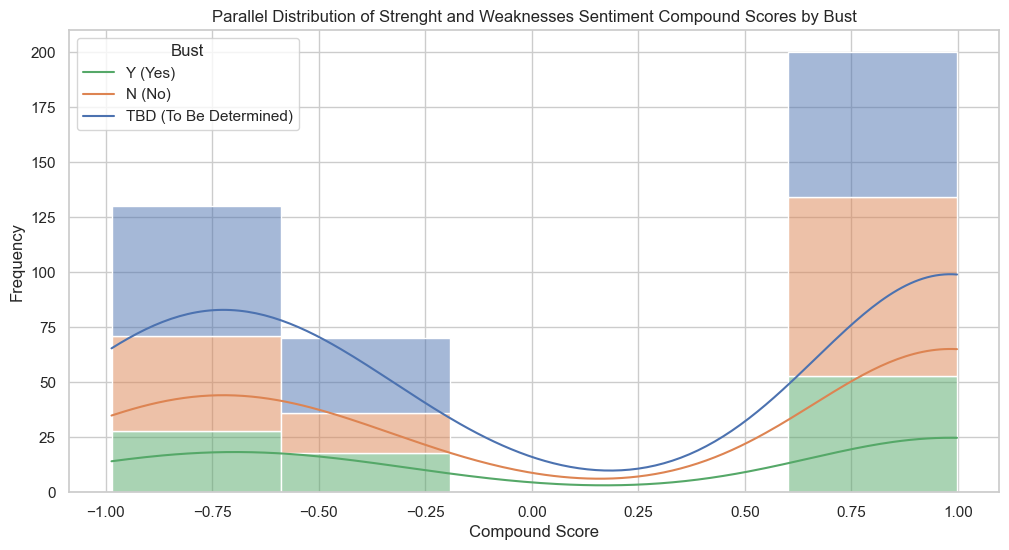

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style of seaborn
sns.set(style="whitegrid")

# Create a parallel distribution plot of scores and Bust2 players using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=df_sentiment, x='Weaknesses_Preprossed_Compound', hue='Bust', multiple='stack', bins=5, kde=True)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Parallel Distribution of Strenght and Weaknesses Sentiment Compound Scores by Bust')
plt.legend(title='Bust', labels=['Y (Yes)', 'N (No)', 'TBD (To Be Determined)'])
plt.show()

In [48]:
# Get the top 5 most positive scores
top_positive_scores = result_df.nlargest(10, 'Weaknesses_Preprossed_Compound')

# Get the top 5 most negative scores
top_negative_scores = result_df.nsmallest(10, 'Weaknesses_Preprossed_Compound')

# Drop rows with NaN values in the specified columns
columns_to_check = ['Weaknesses_Preprossed_Compound']
top_positive_scores = top_positive_scores.dropna(subset=columns_to_check)
top_negative_scores = top_negative_scores.dropna(subset=columns_to_check)

# Print the top 5 most positive scores with PLAYER_NAME and Bust2 column values
print("Top 5 Most Positive Scores:")
print(top_positive_scores[['PLAYER_NAME', 'Weaknesses_Preprossed_Compound']])

# Print the top 5 most negative scores with PLAYER_NAME and Bust2 column values
print("\nTop 5 Most Negative Scores:")
print(top_negative_scores[['PLAYER_NAME',  'Weaknesses_Preprossed_Compound']])


Top 5 Most Positive Scores:
         PLAYER_NAME  Weaknesses_Preprossed_Compound
0        Jalen Green                          0.9979
1         RJ Barrett                          0.9977
2  Marvin Bagley III                          0.9973
3      James Wiseman                          0.9967
4         Kyle Kuzma                          0.9964
5     Chase Budinger                          0.9963
6     Charles Bassey                          0.9962
7      Victor Claver                          0.9959
8       Johnny Davis                          0.9953
9       Tyrese Maxey                          0.9948

Top 5 Most Negative Scores:
           PLAYER_NAME  Weaknesses_Preprossed_Compound
1041     Willie Warren                         -0.9866
1040          AJ Price                         -0.9846
1039      Kemba Walker                         -0.9743
1038     Chris Richard                         -0.9739
1037  DeMarcus Cousins                         -0.9729
1036    Luke Harangody        

In [52]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1041 to 0
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PERSON_ID                       400 non-null    int64  
 1   PLAYER_NAME                     400 non-null    object 
 2   SEASON                          400 non-null    int64  
 3   ROUND_NUMBER                    400 non-null    int64  
 4   ROUND_PICK                      400 non-null    int64  
 5   OVERALL_PICK                    400 non-null    int64  
 6   DRAFT_TYPE                      400 non-null    object 
 7   TEAM_ID                         400 non-null    int64  
 8   TEAM_CITY                       400 non-null    object 
 9   TEAM_NAME                       400 non-null    object 
 10  TEAM_ABBREVIATION               400 non-null    object 
 11  ORGANIZATION                    398 non-null    object 
 12  ORGANIZATION_TYPE               398 non-

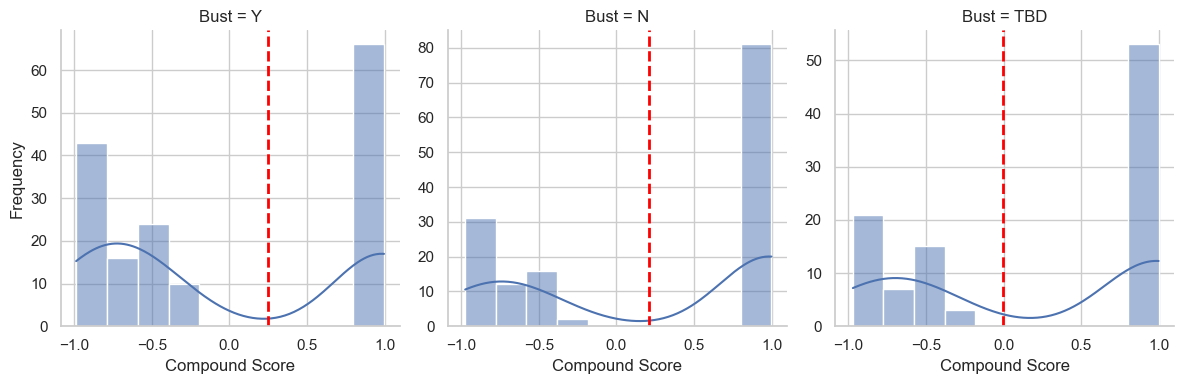

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

df = result_df

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a facet grid of subplots for each 'Bust2' category
g = sns.FacetGrid(df, col='Bust', height=4, sharey=False)
g.map_dataframe(sns.histplot, x='Weaknesses_Preprossed_Compound', bins=10, kde=True)
g.set_axis_labels('Compound Score', 'Frequency')
g.set_titles("Bust = {col_name}")

# Calculate average scores for each combination of 'Bust' and 'Bust3' categories
average_scores = df.groupby(['Bust'])['Weaknesses_Preprossed_Compound'].mean().reset_index()

# Draw average score lines on each subplot
for ax, data in zip(g.axes.flat, average_scores.iterrows()):
    index, row = data
    ax.axvline(row['Weaknesses_Preprossed_Compound'], color='red', linestyle='dashed', linewidth=2)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_val_fold and y_val_pred are your true labels and predicted labels for a fold
report = classification_report(y_val_fold, y_val_pred, target_names=['Label0', 'Label1', 'Label2'])

# Print the classification report
print(report)


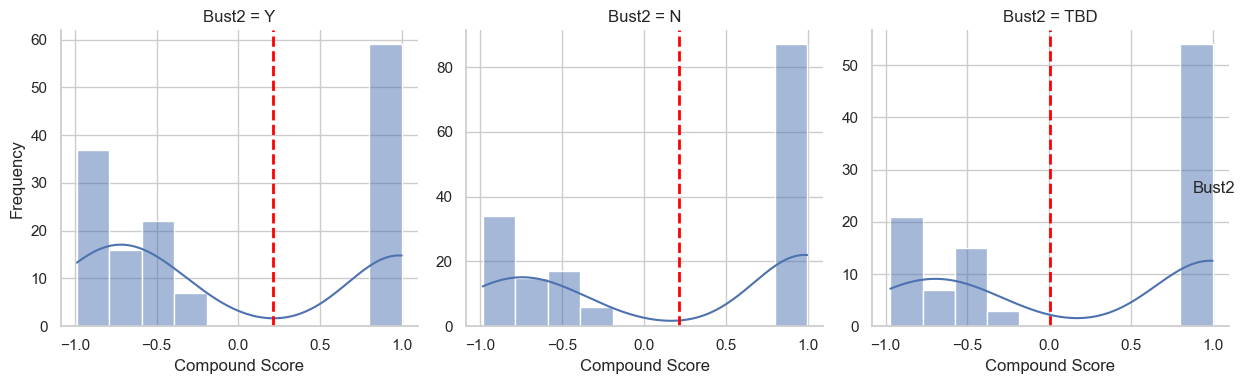

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

df['Sentiment_Score'] = df['Weaknesses_Preprossed_Compound']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a facet grid of subplots for each 'Bust2' category
g = sns.FacetGrid(df, col='Bust2', col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.histplot, x='Sentiment_Score', bins=10, kde=True)
g.set_axis_labels('Compound Score', 'Frequency')
g.set_titles("Bust2 = {col_name}")
g.add_legend(title='Bust2')

# Calculate average scores for each Bust2 category
average_scores = df.groupby('Bust2')['Sentiment_Score'].mean()

# Draw average score lines on each subplot
for ax, avg_score in zip(g.axes.flat, average_scores):
    ax.axvline(avg_score, color='red', linestyle='dashed', linewidth=2)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

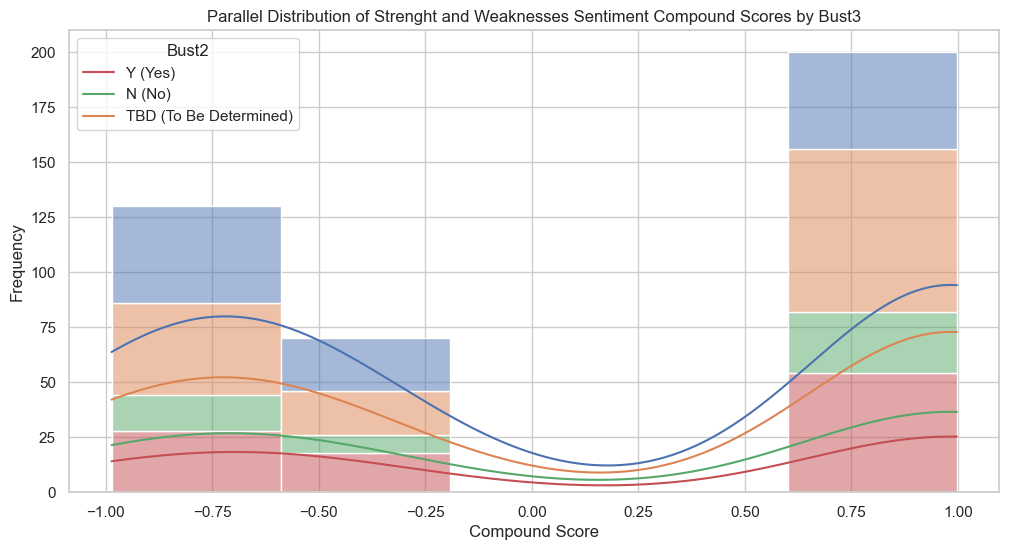

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['Sentiment_Score'] = df['Weaknesses_Preprossed_Compound']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a parallel distribution plot of scores and Bust2 players using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=df_sentiment, x='Weaknesses_Preprossed_Compound', hue='Bust3', multiple='stack', bins=5, kde=True)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Parallel Distribution of Strenght and Weaknesses Sentiment Compound Scores by Bust3')
plt.legend(title='Bust2', labels=['Y (Yes)', 'N (No)', 'TBD (To Be Determined)'])
plt.show()

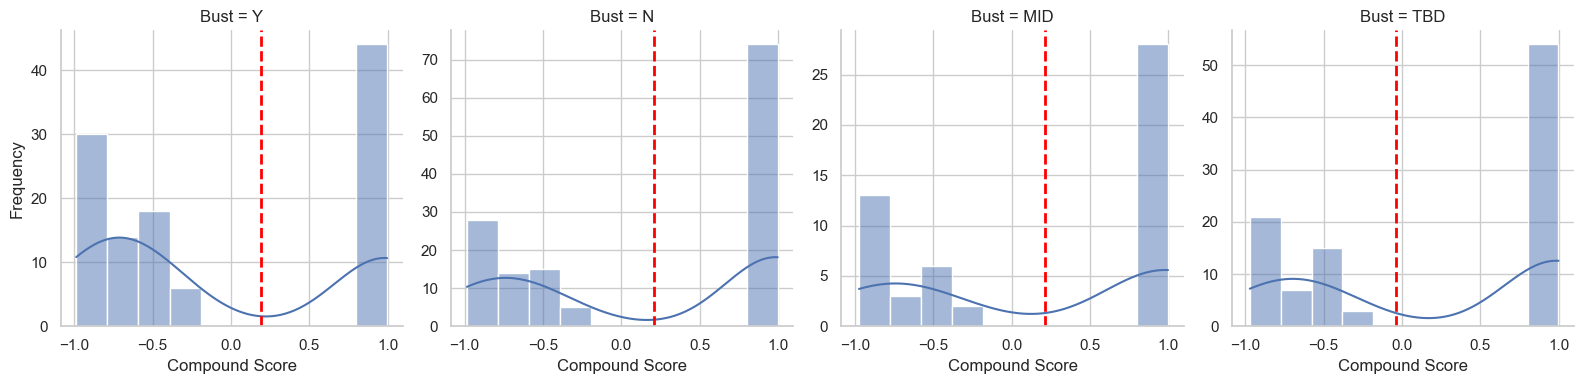

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")


df['Sentiment_Score'] = df['Weaknesses_Preprossed_Compound']
# Assume df contains the necessary data

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a facet grid of subplots for each 'Bust2' category
g = sns.FacetGrid(df, col='Bust3', height=4, sharey=False)
g.map_dataframe(sns.histplot, x='Sentiment_Score', bins=10, kde=True)
g.set_axis_labels('Compound Score', 'Frequency')
g.set_titles("Bust = {col_name}")

# Calculate average scores for each combination of 'Bust' and 'Bust3' categories
average_scores = df.groupby(['Bust3'])['Sentiment_Score'].mean().reset_index()

# Draw average score lines on each subplot
for ax, data in zip(g.axes.flat, average_scores.iterrows()):
    index, row = data
    ax.axvline(row['Sentiment_Score'], color='red', linestyle='dashed', linewidth=2)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


Sentiment Classification Model Accuracy: 0.8625
Fold 1 Accuracy: 0.8504672897196262
Fold 2 Accuracy: 0.8504672897196262
Fold 3 Accuracy: 0.8018867924528302


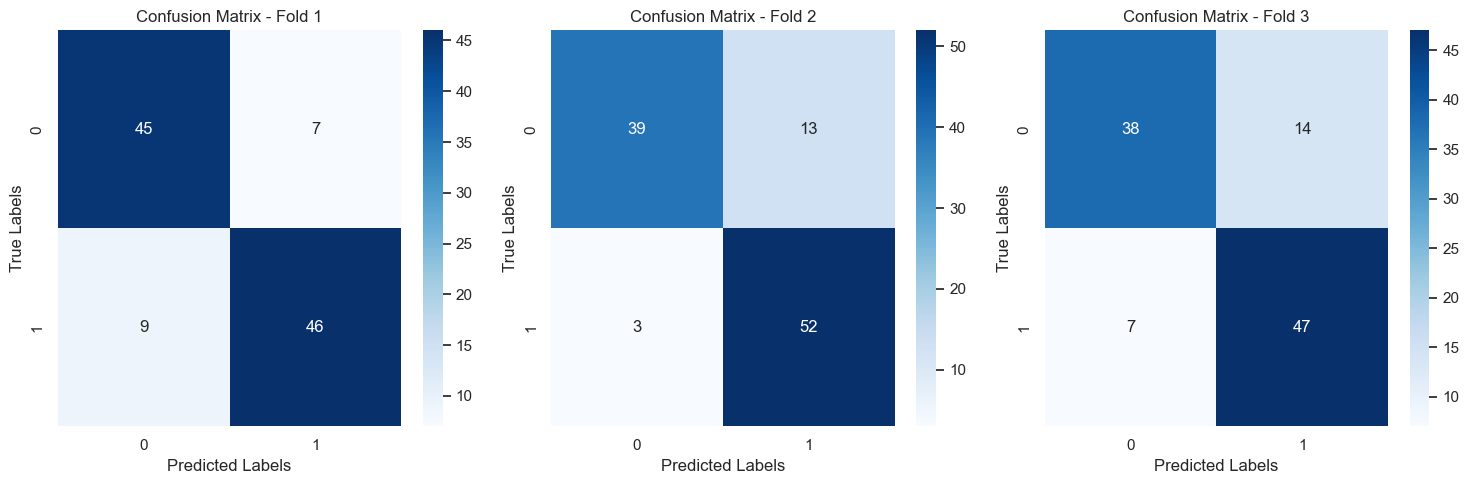

In [77]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

df_sentiment = result_df

# Train-test split for sentiment classification dataset
X_sentiment = df_sentiment['Weaknesses_Preprocessed']
y_sentiment = df_sentiment['Sentiment_Label']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_sentiment_train)

# Transform test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_sentiment_test)

# Create the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the training data
rf_model.fit(X_train_tfidf, y_sentiment_train)

# Predict sentiment labels on the test data
y_sentiment_pred = rf_model.predict(X_test_tfidf)

# Evaluate sentiment classification model
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print("\nSentiment Classification Model Accuracy:", sentiment_accuracy)

# Cross-validation with confusion matrix plotting
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold
    rf_model_fold = RandomForestClassifier(n_estimators=200, random_state=42)
    rf_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = rf_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
    # Calculate and print accuracy for the fold
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold} Accuracy:", fold_accuracy)
    
    # Plot confusion matrix for the fold
    cm = confusion_matrix(y_val_fold, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[fold - 1])
    axes[fold - 1].set_title(f"Confusion Matrix - Fold {fold}")
    axes[fold - 1].set_xlabel("Predicted Labels")
    axes[fold - 1].set_ylabel("True Labels")

# Adjust spacing and display the subplots
plt.tight_layout()
plt.show()

In [79]:
from sklearn.metrics import classification_report

# Assuming y_val_fold and y_val_pred are your true labels and predicted labels for a fold
report = classification_report(y_val_fold, y_val_pred, target_names=['Label0', 'Label1'])

# Print the classification report
print(report)


              precision    recall  f1-score   support

      Label0       0.84      0.73      0.78        52
      Label1       0.77      0.87      0.82        54

    accuracy                           0.80       106
   macro avg       0.81      0.80      0.80       106
weighted avg       0.81      0.80      0.80       106




Sentiment Classification Model Accuracy: 0.925
Fold 1 Accuracy: 0.8878504672897196
Fold 2 Accuracy: 0.897196261682243
Fold 3 Accuracy: 0.8207547169811321


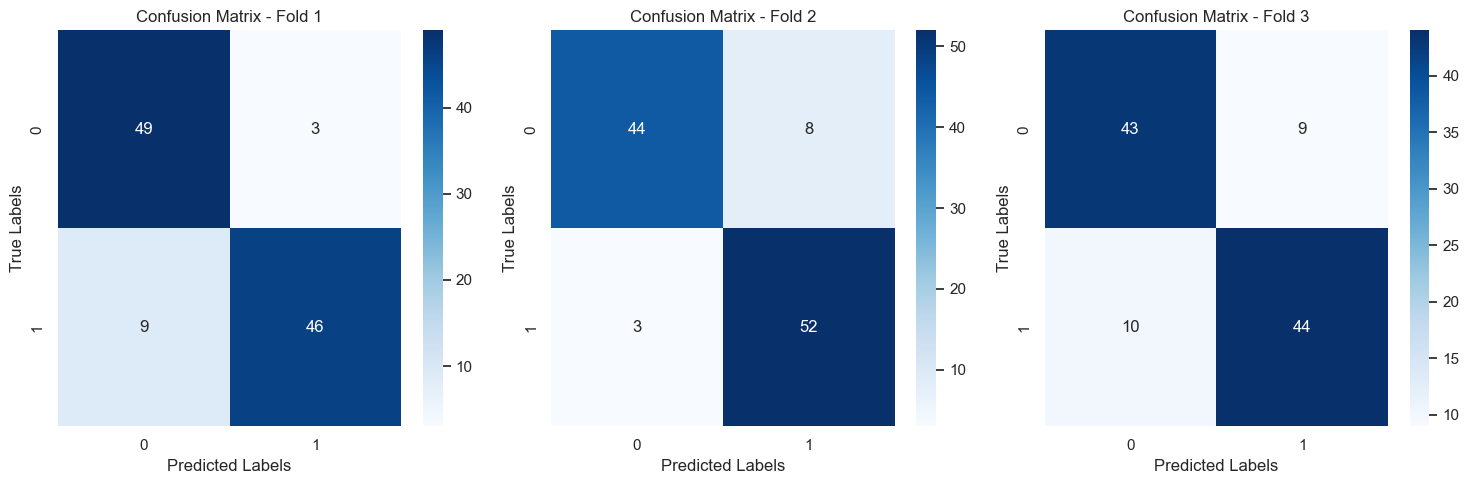

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

df_sentiment = result_df

# Train-test split for sentiment classification dataset
X_sentiment = df_sentiment['Weaknesses_Preprocessed']
y_sentiment = df_sentiment['Sentiment_Label']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_sentiment_train)

# Transform test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_sentiment_test)

# Create the SVM Classifier model
svm_model = SVC(kernel='linear', random_state=42)  # You can choose the kernel as needed (e.g., 'linear', 'rbf', etc.)

# Fit the SVM model on the training data
svm_model.fit(X_train_tfidf, y_sentiment_train)

# Predict sentiment labels on the test data
y_sentiment_pred = svm_model.predict(X_test_tfidf)

# Evaluate sentiment classification model
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print("\nSentiment Classification Model Accuracy:", sentiment_accuracy)

# Cross-validation with confusion matrix plotting
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold
    svm_model_fold = SVC(kernel='linear', random_state=42)  # You can choose the kernel as needed
    svm_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = svm_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
    
    # Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold with a linear kernel
    svm_model_fold = SVC(kernel='linear', random_state=42)
    svm_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = svm_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
    # Calculate and print accuracy for the fold
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold} Accuracy:", fold_accuracy)
    
    # Plot confusion matrix for the fold
    cm = confusion_matrix(y_val_fold, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[fold - 1])
    axes[fold - 1].set_title(f"Confusion Matrix - Fold {fold}")
    axes[fold - 1].set_xlabel("Predicted Labels")
    axes[fold - 1].set_ylabel("True Labels")

# Adjust spacing and display the subplots
plt.tight_layout()
plt.show()


In [65]:
from sklearn.metrics import classification_report

# Assuming y_val_fold and y_val_pred are your true labels and predicted labels for a fold
report = classification_report(y_val_fold, y_val_pred, target_names=['Label0', 'Label1'])

# Print the classification report
print(report)


              precision    recall  f1-score   support

      Label0       0.81      0.83      0.82        52
      Label1       0.83      0.81      0.82        54

    accuracy                           0.82       106
   macro avg       0.82      0.82      0.82       106
weighted avg       0.82      0.82      0.82       106




Sentiment Classification Model Accuracy: 0.9
Fold 1 Accuracy: 0.8878504672897196
Fold 2 Accuracy: 0.897196261682243
Fold 3 Accuracy: 0.8207547169811321


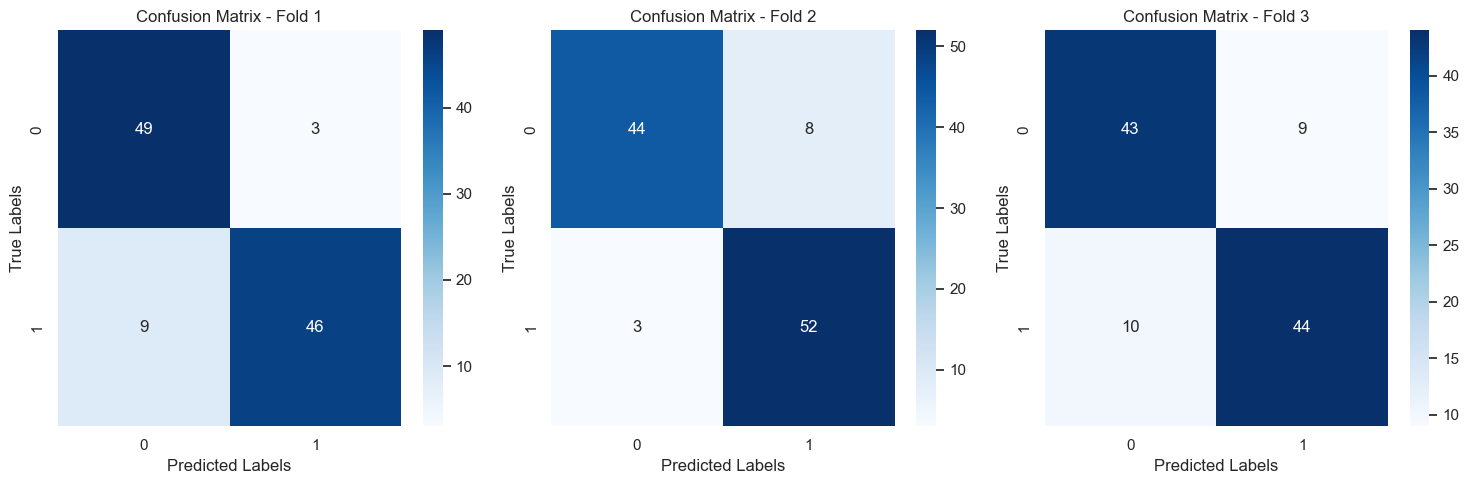

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

df_sentiment = result_df

# Train-test split for sentiment classification dataset
X_sentiment = df_sentiment['Weaknesses_Preprocessed']
y_sentiment = df_sentiment['Sentiment_Label']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_sentiment_train)

# Transform test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_sentiment_test)

# Create the SVM Classifier model with the RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Fit the SVM model on the training data
svm_model.fit(X_train_tfidf, y_sentiment_train)

# Predict sentiment labels on the test data
y_sentiment_pred = svm_model.predict(X_test_tfidf)

# Evaluate sentiment classification model
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print("\nSentiment Classification Model Accuracy:", sentiment_accuracy)

# Cross-validation with confusion matrix plotting
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold with the RBF kernel
    svm_model_fold = SVC(kernel='rbf', random_state=42)
    svm_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = svm_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
    
    # Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold with a linear kernel
    svm_model_fold = SVC(kernel='linear', random_state=42)
    svm_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = svm_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
    # Calculate and print accuracy for the fold
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold} Accuracy:", fold_accuracy)
    
    # Plot confusion matrix for the fold
    cm = confusion_matrix(y_val_fold, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[fold - 1])
    axes[fold - 1].set_title(f"Confusion Matrix - Fold {fold}")
    axes[fold - 1].set_xlabel("Predicted Labels")
    axes[fold - 1].set_ylabel("True Labels")

# Adjust spacing and display the subplots
plt.tight_layout()
plt.show()


In [67]:
from sklearn.metrics import classification_report

# Assuming y_val_fold and y_val_pred are your true labels and predicted labels for a fold
report = classification_report(y_val_fold, y_val_pred, target_names=['Label0', 'Label1'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

      Label0       0.81      0.83      0.82        52
      Label1       0.83      0.81      0.82        54

    accuracy                           0.82       106
   macro avg       0.82      0.82      0.82       106
weighted avg       0.82      0.82      0.82       106



#### Model 4: Supervised Vector Machines (SVM + Stemming + 3 Cross Validations)


Sentiment Classification Model Accuracy: 0.9125
Fold 1 Accuracy: 0.8785046728971962
Fold 2 Accuracy: 0.9252336448598131
Fold 3 Accuracy: 0.8113207547169812


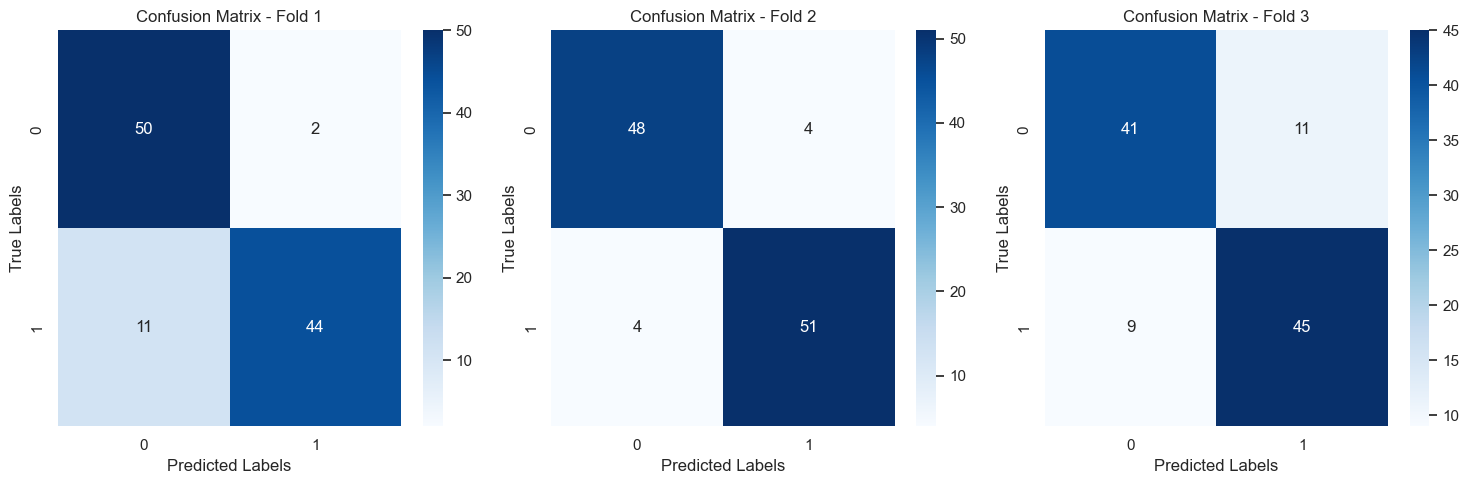

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

df_sentiment = result_df

# Define a Porter Stemmer
stemmer = PorterStemmer()

# Define a function for stemming
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming to the 'Weaknesses_Preprocessed' column
df_sentiment['Weaknesses_Preprocessed'] = df_sentiment['Weaknesses_Preprocessed'].apply(stem_text)

# Train-test split for sentiment classification dataset
X_sentiment = df_sentiment['Weaknesses_Preprocessed']
y_sentiment = df_sentiment['Sentiment_Label']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer with bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))  # Adjust ngram_range as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_sentiment_train)

# Transform test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_sentiment_test)

# Create the SVM Classifier model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the training data
svm_model.fit(X_train_tfidf, y_sentiment_train)

# Predict sentiment labels on the test data
y_sentiment_pred = svm_model.predict(X_test_tfidf)

# Evaluate sentiment classification model
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print("\nSentiment Classification Model Accuracy:", sentiment_accuracy)

# Cross-validation with confusion matrix plotting
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold with a linear kernel
    svm_model_fold = SVC(kernel='linear', random_state=42)
    svm_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = svm_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
    # Calculate and print accuracy for the fold
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold} Accuracy:", fold_accuracy)
    
    # Plot confusion matrix for the fold
    cm = confusion_matrix(y_val_fold, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[fold - 1])
    axes[fold - 1].set_title(f"Confusion Matrix - Fold {fold}")
    axes[fold - 1].set_xlabel("Predicted Labels")
    axes[fold - 1].set_ylabel("True Labels")

# Adjust spacing and display the subplots
plt.tight_layout()
plt.show()


In [69]:
from sklearn.metrics import classification_report

# Assuming y_val_fold and y_val_pred are your true labels and predicted labels for a fold
report = classification_report(y_val_fold, y_val_pred, target_names=['Label0', 'Label1'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

      Label0       0.82      0.79      0.80        52
      Label1       0.80      0.83      0.82        54

    accuracy                           0.81       106
   macro avg       0.81      0.81      0.81       106
weighted avg       0.81      0.81      0.81       106



#### Model 3: Supervised Vector Machines (SVM + Lemmatization + 3 Cross Validations)


Sentiment Classification Model Accuracy: 0.9125
Fold 1 Accuracy: 0.8785046728971962
Fold 2 Accuracy: 0.9345794392523364
Fold 3 Accuracy: 0.8207547169811321


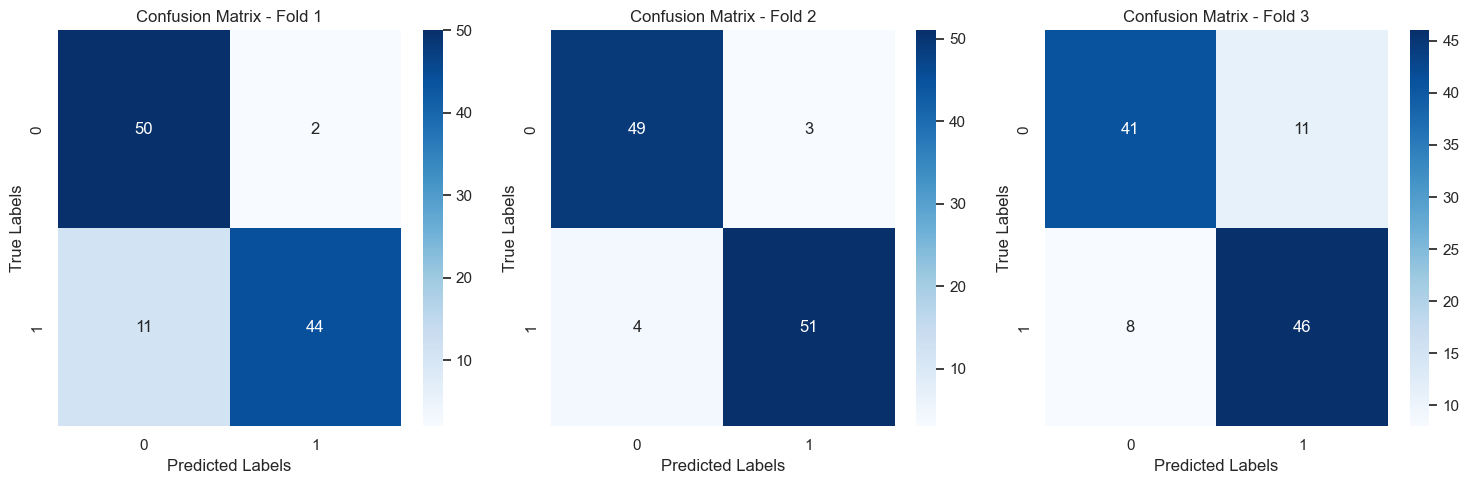

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from nltk.stem import WordNetLemmatizer

df_sentiment = result_df

# Define a lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the 'Weaknesses_Preprocessed' column
df_sentiment['Weaknesses_Preprocessed'] = df_sentiment['Weaknesses_Preprocessed'].apply(lemmatize_text)

# Train-test split for sentiment classification dataset
X_sentiment = df_sentiment['Weaknesses_Preprocessed']
y_sentiment = df_sentiment['Sentiment_Label']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_sentiment_train)

# Transform test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_sentiment_test)

# Create the SVM Classifier model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the training data
svm_model.fit(X_train_tfidf, y_sentiment_train)

# Predict sentiment labels on the test data
y_sentiment_pred = svm_model.predict(X_test_tfidf)

# Evaluate sentiment classification model
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print("\nSentiment Classification Model Accuracy:", sentiment_accuracy)

# Cross-validation with confusion matrix plotting
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold with a linear kernel
    svm_model_fold = SVC(kernel='linear', random_state=42)
    svm_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = svm_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
        
    # Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold with a linear kernel
    svm_model_fold = SVC(kernel='linear', random_state=42)
    svm_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = svm_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
    # Calculate and print accuracy for the fold
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold} Accuracy:", fold_accuracy)
    
    # Plot confusion matrix for the fold
    cm = confusion_matrix(y_val_fold, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[fold - 1])
    axes[fold - 1].set_title(f"Confusion Matrix - Fold {fold}")
    axes[fold - 1].set_xlabel("Predicted Labels")
    axes[fold - 1].set_ylabel("True Labels")

# Adjust spacing and display the subplots
plt.tight_layout()
plt.show()


In [71]:
from sklearn.metrics import classification_report

# Assuming y_val_fold and y_val_pred are your true labels and predicted labels for a fold
report = classification_report(y_val_fold, y_val_pred, target_names=['Label0', 'Label1'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

      Label0       0.84      0.79      0.81        52
      Label1       0.81      0.85      0.83        54

    accuracy                           0.82       106
   macro avg       0.82      0.82      0.82       106
weighted avg       0.82      0.82      0.82       106



#### Supervised Vector Machines (SVM + Stemming + 3 Cross Validations + Bigrams) Results


Sentiment Classification Model Accuracy: 0.85
Fold 1 Accuracy: 0.8317757009345794
Fold 2 Accuracy: 0.8785046728971962
Fold 3 Accuracy: 0.839622641509434


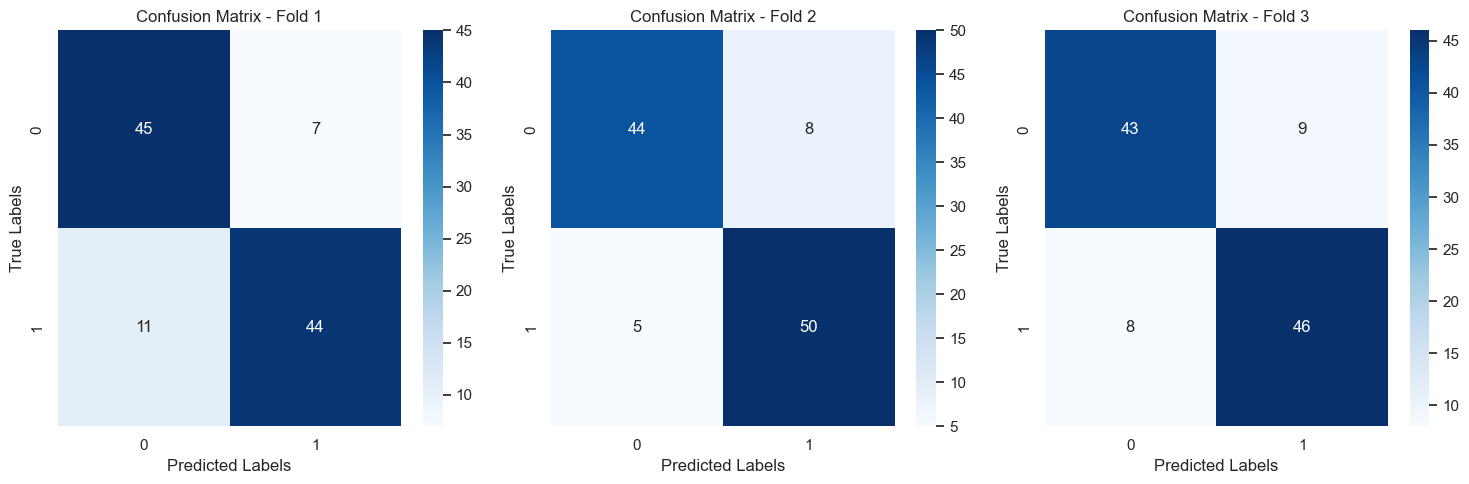

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

df_sentiment = result_df

# Define a Porter Stemmer
stemmer = PorterStemmer()

# Define a function for stemming
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming to the 'Weaknesses_Preprocessed' column
df_sentiment['Weaknesses_Preprocessed'] = df_sentiment['Weaknesses_Preprocessed'].apply(stem_text)

# Train-test split for sentiment classification dataset
X_sentiment = df_sentiment['Weaknesses_Preprocessed']
y_sentiment = df_sentiment['Sentiment_Label']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer with bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Adjust ngram_range as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_sentiment_train)

# Transform test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_sentiment_test)

# Create the SVM Classifier model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the training data
svm_model.fit(X_train_tfidf, y_sentiment_train)

# Predict sentiment labels on the test data
y_sentiment_pred = svm_model.predict(X_test_tfidf)

# Evaluate sentiment classification model
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print("\nSentiment Classification Model Accuracy:", sentiment_accuracy)

# Cross-validation with confusion matrix plotting
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold with a linear kernel
    svm_model_fold = SVC(kernel='linear', random_state=42)
    svm_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = svm_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
        
 # Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold with a linear kernel
    svm_model_fold = SVC(kernel='linear', random_state=42)
    svm_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = svm_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
    # Calculate and print accuracy for the fold
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold} Accuracy:", fold_accuracy)
    
    # Plot confusion matrix for the fold
    cm = confusion_matrix(y_val_fold, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[fold - 1])
    axes[fold - 1].set_title(f"Confusion Matrix - Fold {fold}")
    axes[fold - 1].set_xlabel("Predicted Labels")
    axes[fold - 1].set_ylabel("True Labels")

# Adjust spacing and display the subplots
plt.tight_layout()
plt.show()


In [73]:
from sklearn.metrics import classification_report

# Assuming y_val_fold and y_val_pred are your true labels and predicted labels for a fold
report = classification_report(y_val_fold, y_val_pred, target_names=['Label0', 'Label1'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

      Label0       0.84      0.83      0.83        52
      Label1       0.84      0.85      0.84        54

    accuracy                           0.84       106
   macro avg       0.84      0.84      0.84       106
weighted avg       0.84      0.84      0.84       106




Sentiment Classification Model Accuracy: 0.7375
Fold 1 Accuracy: 0.8504672897196262
Fold 2 Accuracy: 0.8785046728971962
Fold 3 Accuracy: 0.8113207547169812


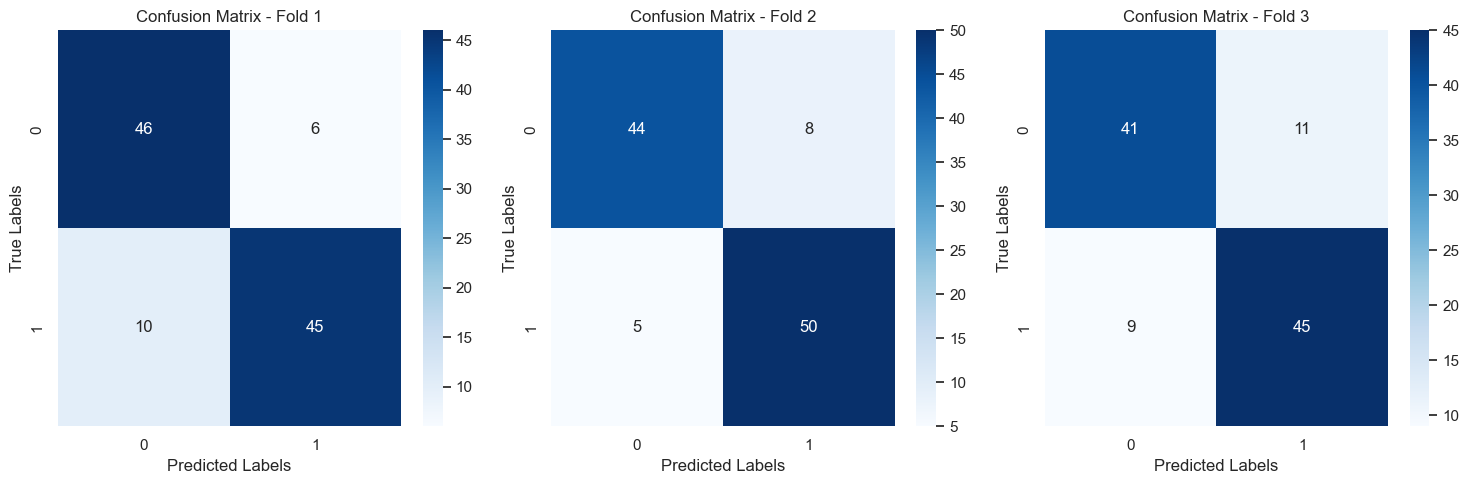

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

df_sentiment = result_df

# Define a Porter Stemmer
stemmer = PorterStemmer()

# Define a function for stemming
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming to the 'Weaknesses_Preprocessed' column
df_sentiment['Weaknesses_Preprocessed'] = df_sentiment['Weaknesses_Preprocessed'].apply(stem_text)

# Train-test split for sentiment classification dataset
X_sentiment = df_sentiment['Weaknesses_Preprocessed']
y_sentiment = df_sentiment['Sentiment_Label']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer with bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Adjust ngram_range as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_sentiment_train)

# Transform test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_sentiment_test)

# Create the SVM Classifier model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the training data
svm_model.fit(X_train_tfidf, y_sentiment_train)

# Predict sentiment labels on the test data
y_sentiment_pred = svm_model.predict(X_test_tfidf)

# Evaluate sentiment classification model
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print("\nSentiment Classification Model Accuracy:", sentiment_accuracy)

# Cross-validation with confusion matrix plotting
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold with a linear kernel
    svm_model_fold = SVC(kernel='linear', random_state=42)
    svm_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = svm_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
    # Calculate and print accuracy for the fold
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold} Accuracy:", fold_accuracy)
    
    # Plot confusion matrix for the fold
    cm = confusion_matrix(y_val_fold, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[fold - 1])
    axes[fold - 1].set_title(f"Confusion Matrix - Fold {fold}")
    axes[fold - 1].set_xlabel("Predicted Labels")
    axes[fold - 1].set_ylabel("True Labels")

# Adjust spacing and display the subplots
plt.tight_layout()
plt.show()


In [75]:
from sklearn.metrics import classification_report

# Assuming y_val_fold and y_val_pred are your true labels and predicted labels for a fold
report = classification_report(y_val_fold, y_val_pred, target_names=['Label0', 'Label1'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

      Label0       0.82      0.79      0.80        52
      Label1       0.80      0.83      0.82        54

    accuracy                           0.81       106
   macro avg       0.81      0.81      0.81       106
weighted avg       0.81      0.81      0.81       106

